In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [3]:
# Define the folder path
folder_path = "../results"

# Get the list of .csv files containing "aoxu" keyword
file_list = [file for file in os.listdir(folder_path) if file.endswith(".csv") and "aoxu" in file]

# Initialize an empty DataFrame to store the data
df_combined = pd.DataFrame()

# Iterate over each file
for file in file_list:
    # Load the .csv file
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    
    # Extract the required columns
    df_selected = df[['molid', 'Score', df.columns[-1]]]
    if 'molid' not in df_combined.columns:
        df_combined = df_selected
    else:
        # Merge the selected data with the combined DataFrame
        df_combined = pd.merge(df_combined, df_selected, on=['molid', 'Score'], how='outer')

# Display the combined DataFrame
df_combined

,molid,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
0,1,-25.63,-22.42,-21.60,-22.53
1,2,-23.03,-22.53,-21.78,-22.52
2,3,-20.79,-22.53,-21.78,-22.52
3,4,-20.35,-22.53,-21.78,-22.52
4,5,-18.78,-22.53,-21.78,-22.52
...,...,...,...,...,...
9995,9996,-10.93,-17.28,-19.53,-17.85
9996,9997,-13.38,-17.21,-19.33,-17.84
9997,9998,-13.11,-17.81,-19.57,-17.51
9998,9999,-22.01,-17.28,-19.53,-17.85


In [4]:
from sklearn.metrics import r2_score, explained_variance_score

# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Compute R^2 score
    r2 = r2_score(df_combined['Score'], df_combined[column])

    # Compute Q^2 score
    q2 = explained_variance_score(df_combined['Score'], df_combined[column])

    print(f"Column: {column}")
    print(f"R^2 Score: {r2}")
    print(f"Q^2 Score: {q2}")
    print()


Column: aoxu_nnetregCG_100K
R^2 Score: -0.05960137858552894
Q^2 Score: -0.05340372793638681

Column: aoxu_nnetregCG_1M
R^2 Score: -0.13735059039629727
Q^2 Score: -0.05050949567552476

Column: aoxu_nnetregCG_500K
R^2 Score: -0.1635285634530863
Q^2 Score: -0.16324710322350477



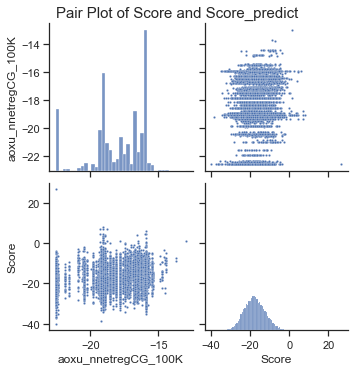

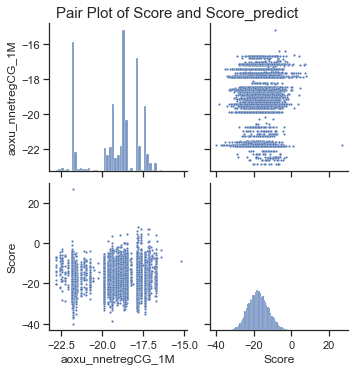

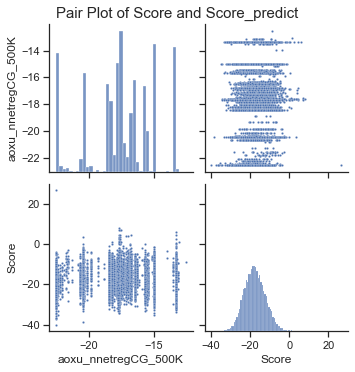

In [11]:
import seaborn as sns
# Iterate over each column starting from the 3rd column
for column in df_combined.columns[2:]:
    # Set the style of the plot
    sns.set(style="ticks")
    pair_plot = sns.pairplot(df_combined, vars=[f'{column}', 'Score'],diag_kind='hist', plot_kws={'s': 5})  # 's' controls the size of the scatter points
    # Set the plot title
    pair_plot.fig.suptitle('Pair Plot of Score and Score_predict', size=15, y=1.02)
    # Save the plot
    plt.savefig(f'./analysis{column}_pairplot.png')
    # plt.show()

### Take the .tab with training set predictions and load into a dataframe

In [45]:
def plot_pairplot(df, column, plot_type='pairplot'):
    # Set the style of the plot
    sns.set(style="ticks")
    if plot_type == 'pairplot':
        pair_plot = sns.pairplot(df, vars=[f'{column}', 'Score'],diag_kind='hist', plot_kws={'s': 5})  # 's' controls the size of the scatter points
        # Set the plot title
        pair_plot.fig.suptitle('Pair Plot of Score and Score_predict', size=15, y=1.02)
    elif plot_type == 'jointplot':
        pair_plot = sns.jointplot(x=f'{column}', y='Score', data=df, kind='reg', height=5)
        pair_plot.fig.suptitle('Joint Plot of Score and Score_predict', size=15, y=1.02)
    
    # Save the plot
    plt.savefig(f'../analysis/{column}_{plot_type}.png')
    # plt.show()

def select_top_n(df, column, n):
    # Sort the DataFrame based on the column
    df_sorted = df.sort_values(by=column, ascending=True)
    # Select the top n rows
    df_top_n = df_sorted.iloc[:n, :]
    return df_top_n

def plot_hist_score(df, n):
    top_score_from_each_file = []
    for column in df.columns[1:]:
        # Sort the DataFrame based on the column
        df_sorted = df.sort_values(by=column, ascending=True)
        # Select the top n rows
        df_top_n = df_sorted.iloc[:n, :]
        # Append the top score to the list
        top_score_from_each_file.append(df_top_n['Score'].values)
    sns.histplot(top_score_from_each_file)

FileNotFoundError: [Errno 2] No such file or directory: './analysis/aoxu_nnetregCG_100K_jointplot.png'

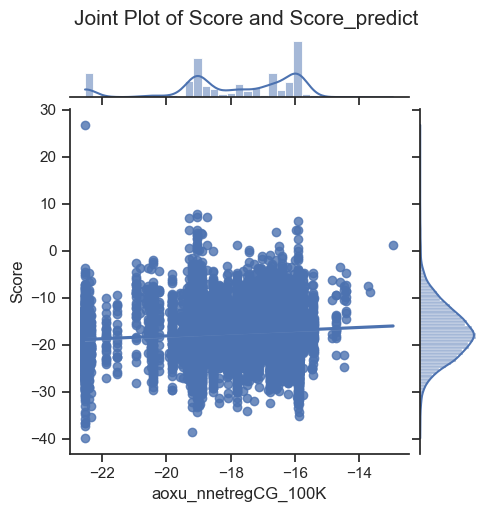

In [46]:
for column in df_combined.columns[2:]:
    plot_pairplot(df_combined, column, plot_type='jointplot')

In [6]:
top_molecules = df_combined.sort_values('Score', ascending=True).iloc[:10]
top_molecules

,molid,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
133,134,-39.94,-22.53,-21.78,-22.52
6066,6067,-38.70,-19.20,-19.41,-20.47
758,759,-37.29,-22.53,-21.78,-22.52
789,790,-36.61,-22.53,-21.78,-22.52
780,781,-36.59,-22.53,-21.78,-22.52
785,786,-35.92,-22.53,-21.78,-22.52
774,775,-35.42,-22.34,-21.60,-22.38
4636,4637,-35.09,-15.89,-17.40,-15.00
770,771,-34.87,-22.53,-21.78,-22.52
775,776,-34.33,-22.53,-21.78,-22.52


In [36]:
df_combined.describe()

,molid,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,-17.541486,-17.973537,-19.158763,-17.449413
std,2886.89568,5.488373,2.004698,1.529344,2.521511
min,1.00000,-39.940000,-22.530000,-22.850000,-22.530000
25%,2500.75000,-21.352500,-19.060000,-19.650000,-18.430000
50%,5000.50000,-17.730000,-17.810000,-18.740000,-17.630000
75%,7500.25000,-13.970000,-16.230000,-17.880000,-15.640000
max,10000.00000,26.730000,-12.950000,-15.170000,-12.510000


<AxesSubplot:xlabel='Score', ylabel='aoxu_nnetregCG_1M'>

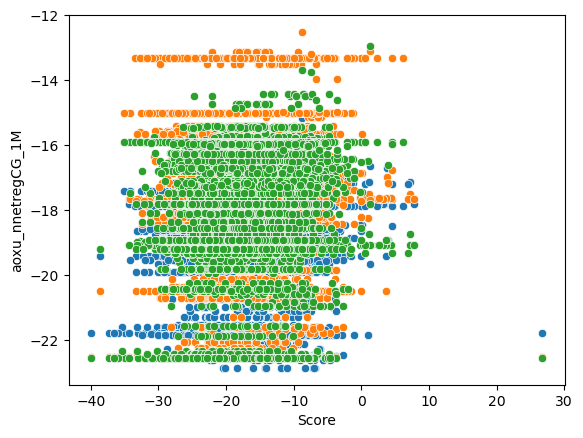

In [38]:
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_1M')
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_500K')
sns.scatterplot(data=df_combined, x='Score', y='aoxu_nnetregCG_100K')

In [7]:
top_score_df = pd.DataFrame()
for column in df_combined.columns[1:]:
    # Sort the DataFrame based on the column
    df_top_n = select_top_n(df_combined, column, 100)
    top_score_df[column] = df_top_n['Score'].values


In [11]:
top_score_df

,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
0,-39.94,-20.34,-11.860,-25.63
1,-38.70,-18.90,-7.144,-31.64
2,-37.29,-27.65,-18.380,-22.63
3,-36.61,-16.96,-20.450,-18.78
4,-36.59,-17.67,-10.920,-15.66
...,...,...,...,...
95,-29.52,-18.07,-25.600,-24.58
96,-29.48,-17.47,-22.760,-20.00
97,-29.46,-18.81,-25.530,-18.70
98,-29.43,-23.34,-5.453,-21.80


In [35]:
# Sort the DataFrame based on the column
column = "aoxu_nnetregCG_100K"
n=100
df_sorted = df_combined.sort_values(by=column, ascending=True)
# Select the top n rows
# df_combined.describe()
df_top_n = df_sorted.iloc[:n, :]
df_top_n.describe()

,molid,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
count,100.000000,100.000000,100.00,1.000000e+02,1.000000e+02
mean,607.930000,-20.937980,-22.53,-2.178000e+01,-2.252000e+01
std,136.791167,5.510237,0.00,1.071183e-14,1.428245e-14
min,421.000000,-33.030000,-22.53,-2.178000e+01,-2.252000e+01
25%,529.750000,-24.430000,-22.53,-2.178000e+01,-2.252000e+01
50%,560.500000,-21.205000,-22.53,-2.178000e+01,-2.252000e+01
75%,586.250000,-17.555000,-22.53,-2.178000e+01,-2.252000e+01
max,952.000000,-4.635000,-22.53,-2.178000e+01,-2.252000e+01


In [18]:
select_top_n(df_combined, 'Score', 10)

,molid,Score,aoxu_nnetregCG_100K,aoxu_nnetregCG_1M,aoxu_nnetregCG_500K
133,134,-39.94,-22.53,-21.78,-22.52
6066,6067,-38.70,-19.20,-19.41,-20.47
758,759,-37.29,-22.53,-21.78,-22.52
789,790,-36.61,-22.53,-21.78,-22.52
780,781,-36.59,-22.53,-21.78,-22.52
785,786,-35.92,-22.53,-21.78,-22.52
774,775,-35.42,-22.34,-21.60,-22.38
4636,4637,-35.09,-15.89,-17.40,-15.00
770,771,-34.87,-22.53,-21.78,-22.52
775,776,-34.33,-22.53,-21.78,-22.52


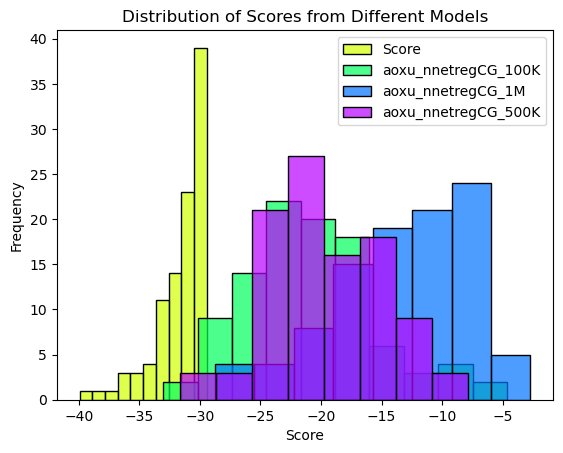

In [8]:
colors = sns.color_palette('hsv', len(top_score_df.columns))  # Generates distinct colors
for i, column in enumerate(top_score_df.columns):
    sns.histplot(top_score_df[column], kde=False, color=colors[i], label=column, alpha=0.7)

plt.legend()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores from Different Models')
plt.show()

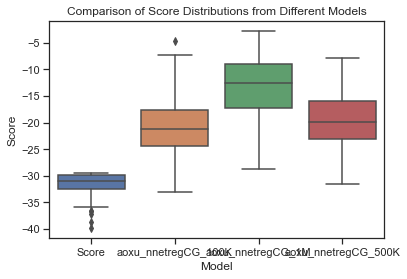

In [102]:
sns.boxplot(data=top_score_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Score Distributions from Different Models')
plt.show()


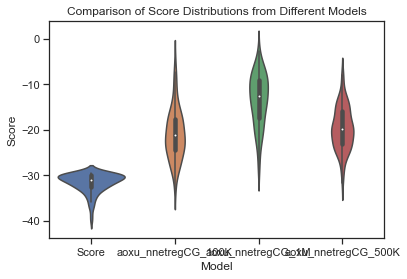

In [103]:
sns.violinplot(data=top_score_df)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Score Distributions from Different Models')
plt.show()